In [13]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, warnings
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [15]:
house_df = house_df.select_dtypes(exclude=['object'])
house_df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


[21.63 29.94 37.06 42.44 46.48 49.79 53.01 56.01 59.   61.91 64.75 67.48
 70.18 72.61 75.02 77.37 79.59 81.67 83.68 85.64 87.44 89.14 90.73 92.12
 93.36 94.4  95.41 96.26 96.97 97.64 98.18 98.64 99.04 99.41 99.72 99.99]


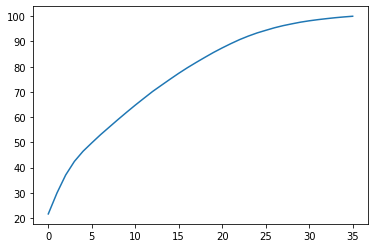

In [16]:
# Determine marginal utility of number of principal components
house_df = house_df.dropna()
X_hdf = scale(house_df)
pca = PCA(n_components=36)
pca.fit(X_hdf)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)
plt.plot(var1)
plt.show()

#Xt = X_hdf.T
#Cx = np.cov(Xt)
#eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
#plt.plot(eig_val_cov)
#plt.show()
#print(eig_val_cov)

In [17]:
# PCA and deriving coefficients
sklearn_pca = PCA(n_components=25)
X = sklearn_pca.fit_transform(X_hdf)
Y = house_df['saleprice']
lrm_housing = linear_model.LinearRegression()
lrm_housing.fit(X,Y)

print('Coefficients: ', lrm.coef_)
print('Intercept: ', lrm.intercept_)

Coefficients:  [25593.81414205 -1196.90833276  2657.67365576 -4003.27625575
 -9079.13499635 -2612.14382396   811.57183416   860.25910164
 -6816.96531764 -2741.36461623 -5971.20801405 -2080.17620891
  3587.37701884  4072.56464709 -2474.99473154 -1983.82443261
 -3410.05795829  4783.78142643  4332.08069009 -1781.00996773
 -3016.03488483  2486.56362886  2562.73312064  4208.42374617
 -5012.38443265]
Intercept:  185506.15254237287


In [18]:
# OLS Summary
#X = sm.add_constant(X)
#results = sm.OLS(Y,X).fit()
#results.summary()

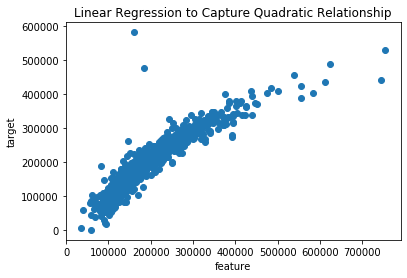

In [19]:
# Determine linearity of the model
w_pred = lrm_housing.predict(X)

# Plot estimated Y and X which should have a quadratic relationship
plt.scatter(Y, w_pred)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Linear Regression to Capture Quadratic Relationship')
plt.show()

In [20]:
# Determine the average error term
errors = Y - w_pred
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.0281103354921094e-11


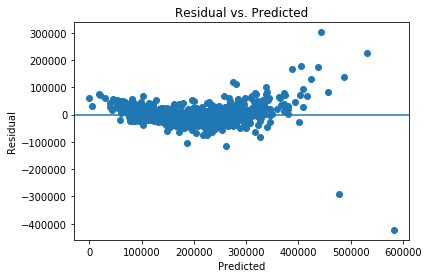

Bartlett test statistic value is 709.828 and p-value is 2.18e-156
Levene test statistic value is 573.384 and p-value is 5.16e-113


In [22]:
# Visualization of homoscedasticity
plt.scatter(w_pred, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Statistical test of homoscedasticity
from scipy.stats import bartlett, levene, boxcox
from sklearn.preprocessing import normalize

b_stats = bartlett(w_pred, errors)
l_stats = levene(w_pred, errors)

print('Bartlett test statistic value is {0:3g} and p-value is {1:.3g}'.format(b_stats[0], b_stats[1]))
print('Levene test statistic value is {0:3g} and p-value is {1:.3g}'.format(l_stats[0], l_stats[1]))

# Errors are heteroscedastic (How do we fix this?)

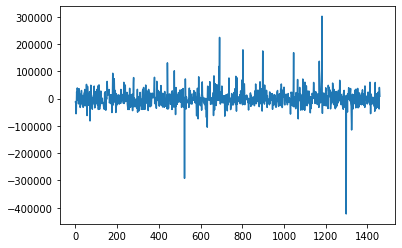

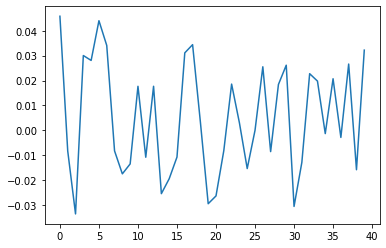

In [23]:
# Check correlation of error terms - visualization
plt.plot(errors)
plt.show()

# Check correlation of error terms - statistical test
from statsmodels.tsa.stattools import acf
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

# What labels does this need?

In [24]:
# Check for feature correlation with errors
from scipy.stats import jarque_bera, normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 72263.06617028719 and p value is 0.0
Normality test statistics is 474.4686246704191 and p value is 9.342158573306476e-104
